In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import mglearn
data = np.loadtxt('data_public/data_train.csv', delimiter=',', dtype=float)
labels = np.loadtxt('data_public/label_train.csv', dtype=float)
test = np.loadtxt('data_public/data_test.csv', delimiter=',', dtype=float)

In [42]:
y_transed = np.array(labels, copy=True)
y_transed[y_transed == -1] = 0
y_transed

array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, y_transed, random_state=0)
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(gamma='scale', probability=True))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [45]:
y_train

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0

In [46]:
from sklearn.metrics import roc_auc_score
param_grid = {'svm__C':[ 0.02, 0.05, 0.08], 'svm__gamma':[0.1, 0.2, 0.5]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=7, scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'svm__C': 0.05, 'svm__gamma': 0.5}
0.642552182163


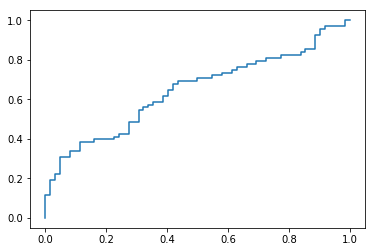

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thre = roc_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:,0])
plt.plot(fpr, tpr)

In [48]:
from sklearn.metrics import roc_curve
#fp, tp, thre = roc_curve(y_test, grid.best_estimator_.decision_function(X_test))
res = grid.best_estimator_.predict_proba(test)[:,1]
print(res)
print(grid.best_estimator_.predict(test))
print(grid.best_estimator_.classes_)

[ 0.46357519  0.46357528  0.46357524  0.46357527  0.46357518  0.46357536
  0.46357521  0.46357528  0.46357526  0.46357531  0.46357529  0.46357518
  0.4635753   0.46357524  0.46357524  0.46357516  0.46357514  0.46357519
  0.46357519  0.46357502  0.46357517  0.46357557  0.46357517  0.46357523
  0.46357519  0.46357532  0.46357524  0.46357525  0.46357521  0.46357518
  0.46357514  0.46357523  0.4635753   0.46357523  0.46357532  0.46357521
  0.4635755   0.46357515  0.46357517  0.46357545  0.46357518  0.46357537
  0.46357526  0.46357527  0.46357533  0.46357516  0.46357522  0.46357519
  0.46357508  0.4635753   0.4635755   0.4635752   0.46357511  0.46357522
  0.46357534  0.46357519  0.46357514  0.46357508  0.46357539  0.46357527
  0.46357525  0.46357522  0.46357541  0.46357538  0.46357522  0.46357519
  0.46357525  0.46357531  0.46357515  0.46357527  0.46357541  0.46357515
  0.46357527  0.4635754   0.46357521  0.46357514  0.46357507  0.46357527
  0.4635752   0.4635753   0.46357518  0.46357508  0

In [33]:
np.savetxt('result5.csv', res, delimiter=',', fmt='%.8f')

In [14]:
from sklearn.metrics import roc_auc_score
param_grid = {'svm__C':[0.065, 0.07, 0.075], 'svm__gamma':[0.35, 0.4, 0.045]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'svm__C': 0.07, 'svm__gamma': 0.4}
0.639943074004


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=0)
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
pipe = Pipeline([("scaler", RobustScaler()), ("svm", SVC(gamma='scale'))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [50]:
def gridsearch(arg, pipe):
    grid = GridSearchCV(pipe, param_grid=arg, cv=5, scoring='roc_auc')
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.score(X_test, y_test))
    print(f"train:{grid.score(X_train, y_train)}")
    return grid

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=0)
pipel = make_pipeline(SelectFromModel(RandomForestClassifier(n_estimators=100)), StandardScaler(), SVC(gamma='scale'))

In [71]:
grid = gridsearch({'svc__C':[1e-05, 1e-04, 1e-03, 1e-02, 0.1], 'svc__gamma':[1e-04, 1e-03, 0.01, 0.1, 1, 10, 100, 10**3],
          'selectfrommodel__threshold':[str(f) + '*mean' for f in [1.1, 1.2, 1.3, 1.5]]}, pipel)

{'selectfrommodel__threshold': '1.1*mean', 'svc__C': 0.001, 'svc__gamma': 0.01}
0.602229601518
train:1.0


In [57]:
svc_grid({'svc__C':[1e-08, 1e-07, 1e-06], 'svc__gamma':[10**4, 10**5, 10**6],
          'selectfrommodel__threshold':[str(f) + '*mean' for f in [1.5, 1.7, 2, 3]]
         }, pipel)

KeyboardInterrupt: 

In [68]:
grid = gridsearch({'svc__C':[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02], 'svc__gamma':[1, 10,10**2, 10**3, 10**4],
          'selectfrommodel__threshold':[str(f) + '*mean' for f in [1.5,1.7, 2]]
         }, pipel)

{'selectfrommodel__threshold': '2*mean', 'svc__C': 1e-07, 'svc__gamma': 1000}
0.592504743833
train:0.7030033662949715


In [66]:
grid.best_estimator_.predict_proba(X_test)[:,1]

AttributeError: predict_proba is not available when  probability=False

In [38]:
from sklearn.neural_network import MLPClassifier
pipe_nn = Pipeline([('sc', StandardScaler()), ('mlp', MLPClassifier())])

In [54]:
params = {'mlp__alpha':[1e-05, 1e-04, 1e-03], 'mlp__max_iter':[1000], 'mlp__hidden_layer_sizes':[10, 50, 70], 'mlp__activation':['relu', 'tanh']}

In [46]:
gridsearch(params, pipe_nn)

{'mlp__alpha': 1, 'mlp__max_iter': 1000}
0.591318785579
train:1.0


In [55]:
gridsearch(params, pipe_nn)

{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': 10, 'mlp__max_iter': 1000}
0.558823529412
train:1.0


In [49]:
from sklearn.linear_model import LogisticRegression
pipe_lr = Pipeline([('select', SelectFromModel(RandomForestClassifier(n_estimators=100))), ('lr', LogisticRegression())])

In [86]:
params = {'lr__C':[1e-05, 1e-04, 1e-03, 0.1], 'lr__penalty':['l1', "l2"], 'lr__solver':['liblinear', 'lbfgs']}
grid = gridsearch(params, pipe_lr)

In [51]:
params = {'lr__C':[1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 0.1], 'lr__penalty':["l1","l2"]}
grid = gridsearch(params, pipe_lr)
p = grid.best_estimator_.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

{'lr__C': 1e-06, 'lr__penalty': 'l2'}
0.590370018975
train:0.8327898169577109


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
print(p)
print(grid.best_estimator_.predict(X_test))

[ 0.50003387  0.50003246  0.50003796  0.50005488  0.49993464  0.49999714
  0.49998842  0.49993462  0.49995247  0.49993704  0.49998589  0.4999099
  0.49994666  0.50008408  0.5000157   0.50003422  0.49996685  0.49985603
  0.49990385  0.50013121  0.50001651  0.49992744  0.50000194  0.50001525
  0.49999614  0.50013444  0.4999793   0.49999594  0.49988677  0.50001686
  0.50004161  0.50001724  0.49997025  0.49989707  0.49997022  0.50001101
  0.50002616  0.50006214  0.50001373  0.50004173  0.49995128  0.50005096
  0.50004463  0.50007243  0.50009592  0.50004011  0.49994936  0.49996997
  0.49998747  0.49989656  0.50000433  0.50013548  0.4998888   0.50010205
  0.49992804  0.49990589  0.50002226  0.50005734  0.49996518  0.50011946
  0.50004675  0.4999199   0.4999538   0.50004681  0.49997427  0.50002501
  0.4999908   0.49993054  0.49994397  0.49998743  0.49998535  0.50000956
  0.50002876  0.49990131  0.49997524  0.50000442  0.49997775  0.50008042
  0.49990399  0.50003936  0.49996742  0.50000843  0.

In [93]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
pipegpc = Pipeline([('sc', StandardScaler()), ('gpc', GaussianProcessClassifier())])
grid = gridsearch({'gpc__kernel':[1.0*RBF(1.0)], 'optimizer':[]}, pipegpc)

{'gpc__kernel': 1**2 * RBF(length_scale=1)}
0.5
train:1.0
